# PROJECT 2: HOUSING - PRICE PREDICTION

Description: In this project, we are going to create model to predict housing price. A US-based housing company named Surprise Housing has decided to enter the Australian market. 
The goal of this statistical project analysis is to understand the relationship between house features and how these variables are used to predict house price. 
Objective: 
How do these variables describe the price of the house?   
Which variables are important to predict the price of variable?
To build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not?
Train Data: Our training data consists of 1,168 examples of houses with 81 features describing every aspect of the house. We are given sale prices (labels) for each house. The training data is what we will use to “teach” our models.   
    
Test Data: Our test data set excludes the sale price because this is what we are trying to predict. Once our models have been built we will run the best one. This Test dataset consists of 292 rows with 80 features describing every aspect of the house based on test data history.

In [1]:
#Importing Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To view the full dataset first we need to set display.max_rows
pd.set_option('display.max_columns',None)

In [3]:
#Uploading the train dataset
train=pd.read_csv("Housing-train.csv")
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,0,432,882,GasA,TA,Y,SBrkr,900,0,0,900,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1970.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,1949,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1126,0,0,1126,0,0,2,0,2,1,Gd,5,Typ,0,NaN,Detchd,2002.0,Fin,2,520,TA,TA,N,0,96,0,0,0,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,1976,1976,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,566,Unf,0,289,855,GasA,TA,Y,SBrkr,855,601,0,1456,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1976.0,Unf,2,440,TA,TA,Y,87,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,Ga

In [4]:
#Uploading the train dataset
test=pd.read_csv("Housing-test.csv")
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,468.0,TA,TA,PConc,Gd,TA,No,GLQ,33,Unf,0,1530,1563,GasA,Ex,Y,SBrkr,1563,0,0,1563,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2007.0,RFn,3,758,TA,TA,Y,144,99,0,0,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,686,Unf,0,304,990,GasA,Ex,Y,SBrkr,990,0,0,990,0,1,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1996.0,Unf,2,672,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,399,Unf,0,605,1004,GasA,Ex,Y,SBrkr,1004,660,0,1664,0,0,2,0,3,1,TA,7,Typ,2,Gd,Detchd,1950.0,Unf

In [5]:
#Checking the dimensions of train dataset
train.shape

(1168, 81)

This illustrates that train dataset has 1168 rows and 81 columns.

In [6]:
#Checking the dimensions of test dataset
test.shape
#292 rows and 80 columns

(292, 80)

In [7]:
#printing the concise summary of train dataset - such as Column Name, No. of non-null values of columns, Dtype of the dataset, and Memory Usage.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

Train Dataset Description: 
This training dataset consists of 1,168 rows with 81 features describing every aspect of the house. We are given sale prices (SalePrice) for each house. The training data is what we will use to “teach” or train our models.
This dataset having null values which we will handle later on. It consists of 3 float type, 35 integer type and 43 object type.

In [8]:
#printing the concise summary of test dataset - such as Column Name, No. of non-null values of columns, Dtype of the dataset, and Memory Usage.
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

Test Dataset Description: 
This Test dataset consists of 292 rows with 80 features describing every aspect of the house based on test data history. Target feature is not available here as train dataset. The Test data is what we will use to “teach” or train our models.
This dataset having null values which we will handle later on. It consists of 4 float type, 34 integer type and 42 object type.

In [9]:
#Statistical Summary of train dataset - showing basic statistical characteristics of each numerical feature (int64 and float64 types): number of non-missing values, mean, standard deviation, range, median, 0.25, 0.50, 0.75 quartiles.
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1104.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,1978.193841,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,24.890704,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
#Statistical Summary of test dataset - showing basic statistical characteristics of each numerical feature (int64 and float64 types): number of non-missing values, mean, standard deviation, range, median, 0.25, 0.50, 0.75 quartiles.
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold
count,292.000000,292.000000,247.000000,292.000000,292.000000,292.000000,292.000000,292.000000,291.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.00000,292.000000,292.000000,275.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.0,0.0,292.000000,292.000000,292.000000
mean,755.955479,57.414384,66.425101,10645.143836,6.078767,5.493151,1972.616438,1985.294521,109.171821,439.294521,46.157534,557.315068,1042.767123,1133.691781,339.657534,3.702055,1477.051370,0.424658,0.065068,1.575342,0.359589,2.794521,1.05137,6.417808,0.595890,1979.760000,1.729452,457.458904,86.397260,47.061644,17.708904,2.489726,15.099315,0.0,NaN,28.184932,6.232877,2007.859589
std,442.565228,43.780649,21.726343,13330.669795,1.356147,1.063267,30.447016,20.105792,175.030021,429.559675,152.467119,411.043768,424.561153,366.941919,424.278825,38.219527,514.199429,0.508831,0.247070,0.547856,0.494795,0.807336,0.23616,1.728105,0.621259,23.868875,0.754430,210.785591,121.898836,65.865449,51.892906,30.247488,58.483473,0.0,NaN,224.036218,2.774556,1.322867
min,6.000000,20.000000,21.000000,1526.000000,3.000000,3.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,372.000000,0.000000,0.000000,520.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,0.000000,1916.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,1.000000,2006.000000
25%,377.750000,20.000000,53.500000,7200.000000,5.000000,5.000000,1954.000000,1968.000000,0.000000,0.000000,0.000000,255.000000,771.750000,858.000000,0.000000,0.000000,1061.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.00000,5.000000,0.000000,1964.000000,1.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,4.000000,2007.000000
50%,778.000000,50.000000,65.000000,9200.000000,6.000000,5.000000,1976.000000,1994.000000,0.000000,369.500000,0.000000,487.000000,971.000000,1047.500000,0.000000,0.000000,1440.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.00000,6.000000,1.000000,1979.000000,2.000000,467.500000,0.000000,28.500000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,6.000000,2008.000000
75%,1152.250000,70.000000,79.000000,11658.750000,7.000000,6.000000,2001.000000,2003.250000,180.000000,700.500000,0.000000,780.000000,1322.000000,1370.500000,717.000000,0.000000,1720.250000,1.000000,0.000000,2.000000,1.000000,3.000000,1.00000,7.000000,1.000000,2003.000000,2.000000,569.750000,149.250000,66.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,8.000000,2009.000000
max,1456.000000,190.000000,150.000000,215245.000000,10.000000,9.000000,2009.000000,2010.000000,1031.000000,1767.000000,1085.000000,1935.000000,3094.000000,2402.000000,1589.000000,479.000000,3447.000000,2.000000,1.000000,3.000000,2.000000,6.000000,3.00000,12.000000,2.000000,2010.000000,4.000000,1052.000000,728.000000,418.000000,330.000000,407.000000,396.000000,0.0,NaN,3500.000000,12.000000,2010.000000


In [11]:
#Checking Null values
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [12]:
#Checking Null values
test.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

In [13]:
#checking columns which have null values
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

In [14]:
#checking feature which have null values
test.columns[test.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

Thus here we noticed that all above columns have null values.

In [15]:
#Display feature with null values count
columns_null=train.columns[train.isnull().any()]
for column in columns_null:
    print(column, train[column].isnull().sum())

LotFrontage 214
Alley 1091
MasVnrType 7
MasVnrArea 7
BsmtQual 30
BsmtCond 30
BsmtExposure 31
BsmtFinType1 30
BsmtFinType2 31
FireplaceQu 551
GarageType 64
GarageYrBlt 64
GarageFinish 64
GarageQual 64
GarageCond 64
PoolQC 1161
Fence 931
MiscFeature 1124


In [16]:
#Display feature with null values count
columns_null=test.columns[test.isnull().any()]
for column in columns_null:
    print(column, test[column].isnull().sum())

LotFrontage 45
Alley 278
MasVnrType 1
MasVnrArea 1
BsmtQual 7
BsmtCond 7
BsmtExposure 7
BsmtFinType1 7
BsmtFinType2 7
Electrical 1
FireplaceQu 139
GarageType 17
GarageYrBlt 17
GarageFinish 17
GarageQual 17
GarageCond 17
PoolQC 292
Fence 248
MiscFeature 282


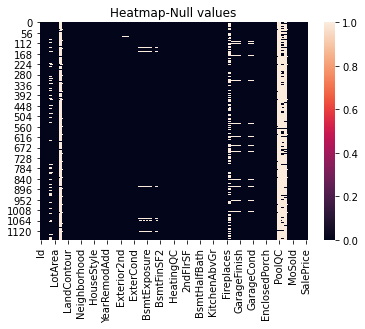

In [17]:
#Visulaising the null values in graph
sns.heatmap(train.isnull())
plt.title("Heatmap-Null values")
plt.show()

From above graph we observed that all white spaces are representing the null values. All columns ('LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature') are showing white spaces as its have null values. 

      

# Data Cleaning

In [18]:
#checking columns which have null values
test.columns[test.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [19]:
#Removing null values of test dataset
test["PoolQC"] = test["PoolQC"].fillna("None")
test["MiscFeature"] = test["MiscFeature"].fillna("None")
test["Alley"] = test["Alley"].fillna("None")
test["Fence"] = test["Fence"].fillna("None")
test["FireplaceQu"] = test["FireplaceQu"].fillna("None")
test["LotFrontage"] = test.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    test[col] = test[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    test[col] = test[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    test[col] = test[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    test[col] = test[col].fillna('None')

In [20]:
test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

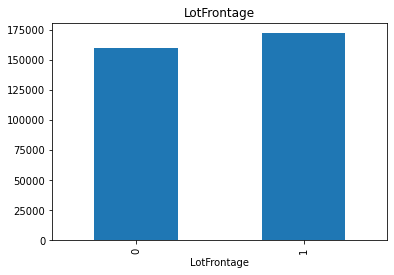

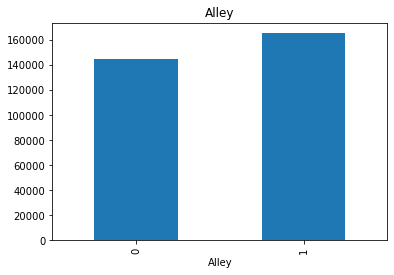

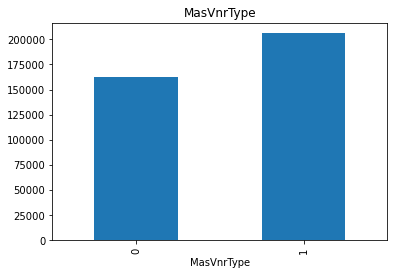

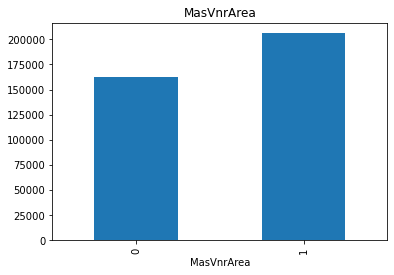

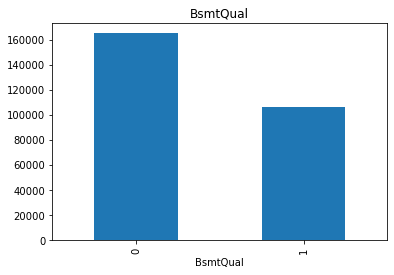

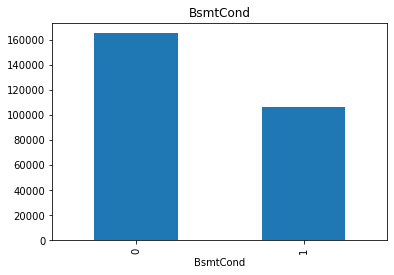

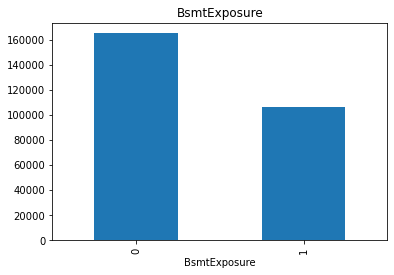

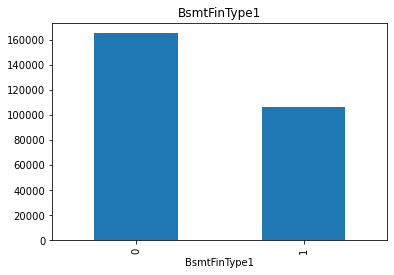

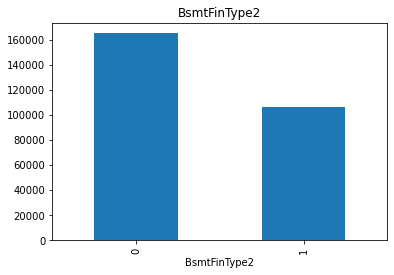

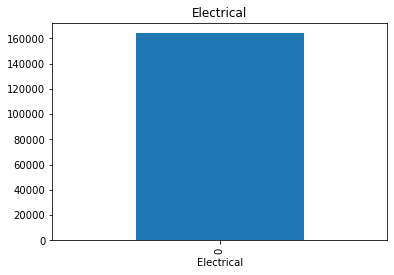

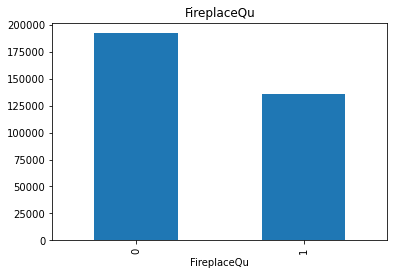

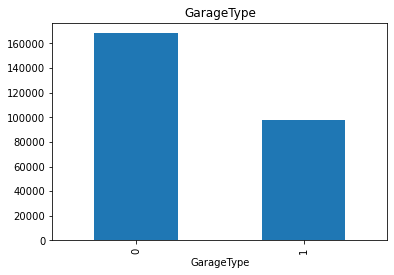

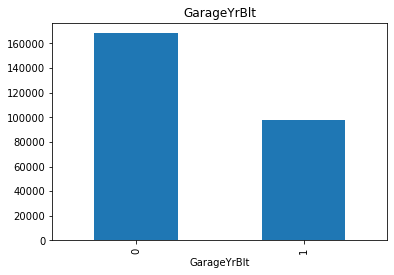

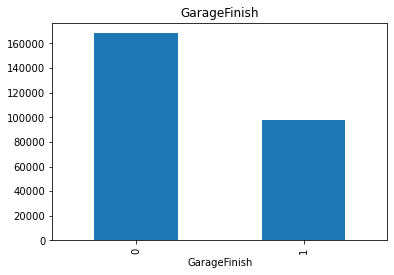

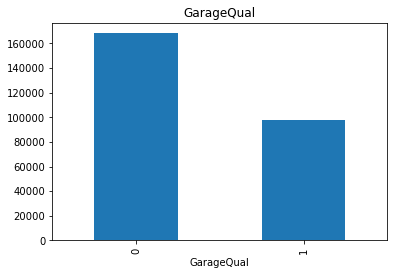

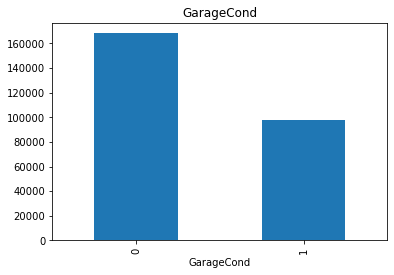

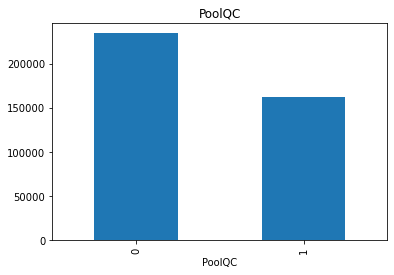

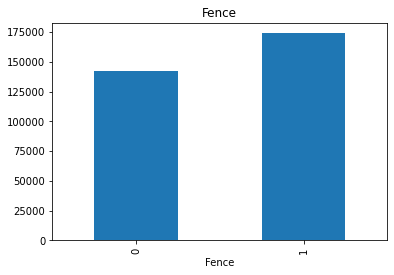

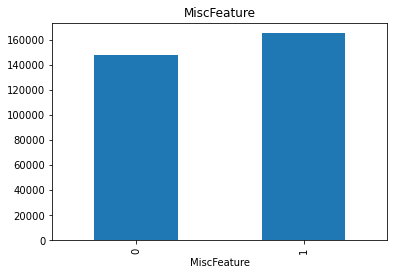

In [21]:
#Since there are many missing values, we need to analyse the relationship with target variable i.e. Sale Price
#Plotting null values columns
for feature in columns_null:
    data=train.copy()
    
    data[feature]=np.where( data[feature].isnull(), 1, 0)
    
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

Thus here with null values plotting we observed that there is relation between missing values and dependant variable as the bar graph with 1 i.e. most of the null values is higher than non null values bar graph. So we need to replace with some meaningful values which we'll do in feature Engineering section.

In [22]:
#Now we'll check for numerical variables thct contain null values
null_numerical=[feature for feature in train.columns if train[feature].isnull().sum()>1 and train[feature].dtypes!='O']
for feature in null_numerical:
    print("{}:{}%missing values".format(feature,np.around(train[feature].isnull().mean(),4)))

LotFrontage:0.1832%missing values
MasVnrArea:0.006%missing values
GarageYrBlt:0.0548%missing values


In [23]:
#Handling numerical null values of train dataset
#Here we are replacing the null values with median since there are outliers
for feature in null_numerical:
    median_value=train[feature].median()
    #create a new feature to store nan values
    train[feature+'NaN']=np.where(train[feature].isnull(),1,0)
    train[feature].fillna(median_value,inplace=True)
train[null_numerical].isnull().sum()
    
   

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [24]:
#Now we'll check for numerical variables that contain null values
null_numerical=[feature for feature in test.columns if test[feature].isnull().sum()>1 and test[feature].dtypes!='O']
for feature in null_numerical:
    print("{}:{}%missing values".format(feature,np.around(test[feature].isnull().mean(),4)))

In [25]:
#Handling numerical null values of test dataset
#Here we are replacing the null values with median since there are outliers
for feature in null_numerical:
    median_value=test[feature].median()
    #create a new feature to store nan values
    test[feature+'NaN']=np.where(test[feature].isnull(),1,0)
    test[feature].fillna(median_value,inplace=True)
test[null_numerical].isnull().sum()

Series([], dtype: float64)

In [26]:
test['PoolQC'].fillna('No Pool' , inplace = True) #handling null values as its already exist
test[null_numerical].isnull().sum()

Series([], dtype: float64)

In [27]:
#Handling temporal variables 
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    train[feature]=train['YrSold']-train[feature]

In [28]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontageNaN,MasVnrAreaNaN,GarageYrBltNaN
0,127,120,RL,70.0,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,31,31,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,30.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000,1,0,0
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,37,37,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,37.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000,0,0,0
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,11,10,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,10.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790,0,0,0
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,33,33,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,33.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000,0,0,0
4,422,20,RL,70.0,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,32,9,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,32.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000,1,0,0


In [29]:
#Handling temporal variables of test dataset
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    test[feature]=test['YrSold']-test[feature]

In [30]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,None,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2,1,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,None,None,None,0,7,2007,WD,Normal
1,1018,120,RL,66.0,5814,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,25,25,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,25.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,None,None,None,0,8,2009,COD,Abnorml
2,929,20,RL,65.0,11838,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,8,8,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,8.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,None,None,None,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,None,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,68,59,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,68.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,1,1,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,1.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,None,None,None,0,1,2008,WD,Normal


In [31]:
#combing all numerical features
num_features=[features for features in train.columns if train[features].dtypes!="O"]
print(len(num_features))
train[num_features].head()

41


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontageNaN,MasVnrAreaNaN,GarageYrBltNaN
0,127,120,70.0,4928,6,5,31,31,0.0,120,0,958,1078,958,0,0,958,0,0,2,0,2,1,5,1,30.0,2,440,0,205,0,0,0,0,0,2,2007,128000,1,0,0
1,889,20,95.0,15865,8,6,37,37,0.0,351,823,1043,2217,2217,0,0,2217,1,0,2,0,4,1,8,1,37.0,2,621,81,207,0,0,224,0,0,10,2007,268000,0,0,0
2,793,60,92.0,9920,7,5,11,10,0.0,862,0,255,1117,1127,886,0,2013,1,0,2,1,3,1,8,1,10.0,2,455,180,130,0,0,0,0,0,6,2007,269790,0,0,0
3,110,20,105.0,11751,6,6,33,33,480.0,705,0,1139,1844,1844,0,0,1844,0,0,2,0,3,1,7,1,33.0,2,546,0,122,0,0,0,0,0,1,2010,190000,0,0,0
4,422,20,70.0,16635,6,7,32,9,126.0,1246,0,356,1602,1602,0,0,1602,0,1,2,0,3,1,8,1,32.0,2,529,240,0,0,0,0,0,0,6,2009,215000,1,0,0


Thus in total we have 38 numerical features.

In [32]:
#combing all numerical features
num_feature=[features for features in test.columns if test[features].dtypes!="O"]
print(len(num_feature))
test[num_feature].head()

37


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,337,20,86.0,14157,9,5,2,1,200.0,1249,0,673,1922,1922,0,0,1922,1,0,2,0,3,1,8,1,2.0,3,676,178,51,0,0,0,0,0,7,2007
1,1018,120,66.0,5814,8,5,25,25,0.0,1036,0,184,1220,1360,0,0,1360,1,0,1,0,1,1,4,1,25.0,2,565,63,0,0,0,0,0,0,8,2009
2,929,20,65.0,11838,8,5,8,8,0.0,0,0,1753,1753,1788,0,0,1788,0,0,2,0,3,1,7,1,8.0,2,522,202,151,0,0,0,0,0,6,2009
3,1148,70,75.0,12000,7,7,68,59,0.0,275,0,429,704,860,704,0,1564,0,0,1,1,3,1,7,1,68.0,1,234,0,0,0,0,0,0,0,7,2009
4,1227,60,86.0,14598,6,5,1,1,74.0,0,0,894,894,894,1039,0,1933,0,0,2,1,4,1,9,1,1.0,3,668,100,18,0,0,0,0,0,1,2008


In [33]:
#taking out year feature from numerical feature
year_features=[features for features in num_features if 'Yr' in features or 'Year' in features]
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'GarageYrBltNaN']

In [34]:
#discreate variable
discrete_features=[feature for feature in num_features if len(train[feature].unique())<25 and feature not in year_features+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_features)))

Discrete Variables Count: 19


In [35]:
#discreate variable
discrete_feature=[feature for feature in num_feature if len(test[feature].unique())<25 and feature not in year_features+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 18


In [36]:
train[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,LotFrontageNaN,MasVnrAreaNaN
0,120,6,5,0,0,0,2,0,2,1,5,1,2,0,0,0,2,1,0
1,20,8,6,0,1,0,2,0,4,1,8,1,2,0,0,0,10,0,0
2,60,7,5,0,1,0,2,1,3,1,8,1,2,0,0,0,6,0,0
3,20,6,6,0,0,0,2,0,3,1,7,1,2,0,0,0,1,0,0
4,20,6,7,0,0,1,2,0,3,1,8,1,2,0,0,0,6,1,0


In [37]:
test[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
0,20,9,5,0,1,0,2,0,3,1,8,1,3,0,0,0,0,7
1,120,8,5,0,1,0,1,0,1,1,4,1,2,0,0,0,0,8
2,20,8,5,0,0,0,2,0,3,1,7,1,2,0,0,0,0,6
3,70,7,7,0,0,0,1,1,3,1,7,1,1,0,0,0,0,7
4,60,6,5,0,0,0,2,1,4,1,9,1,3,0,0,0,0,1


In [38]:
#combing all categorical features
cat_features=[features for features in train.columns if train[features].dtypes=="O"]
print(len(cat_features))
train[cat_features].head()

43


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,Gd,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,Gd,Gd,PConc,TA,Gd,Gd,ALQ,Rec,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,None,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Plywood,Plywood,BrkFace,TA,TA,CBlock,Gd,TA,No,BLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,MnPrv,NaN,COD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,CemntBd,CmentBd,Stone,Gd,TA,CBlock,Gd,TA,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [39]:
#combing all categorical features
cat_feature=[features for features in test.columns if test[features].dtypes=="O"]
print(len(cat_feature))
test[cat_feature].head()

43


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,Hip,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Gd,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,CBlock,Gd,TA,Av,GLQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Ex,Attchd,RFn,TA,TA,Y,None,None,None,COD,Abnorml
2,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,Hip,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Av,Unf,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,Ex,Y,SBrkr,Fa,Typ,Gd,Attchd,Unf,TA,TA,Y,None,None,None,WD,Normal
4,RL,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Gd,TA,Mn,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,BuiltIn,Fin,TA,TA,Y,None,None,None,WD,Normal


In [40]:
#Continous Variables
countinous_features=[feature for feature in num_features if feature not in discrete_features+['Id']]
print("Continous feature count {}".format(len(countinous_features)))

Continous feature count 21


In [41]:
#Continous Variables
countinous_feature=[feature for feature in num_feature if feature not in discrete_feature+['Id']]
print("Continous feature count {}".format(len(countinous_feature)))

Continous feature count 18


# Exploratory Data Analysis (EDA)

# Data Visualization

Text(0.5, 1.0, 'House Price  YearSold')

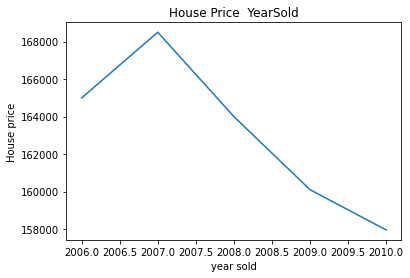

In [42]:
#Lets analyse the temporal Datatime variable(variables holding values like no. of years or no. of days)
#Here we are analysing whether there is relation between year the house sold and sale price.
train.groupby("YrSold")["SalePrice"].median().plot()  # taking median of sale price and plotting with year variables
plt.xlabel('year sold')
plt.ylabel('House price')
plt.title('House Price  YearSold')

Here we observed that with increase in year of house sold the price of house is decreasing. With this we are trying to get more information.

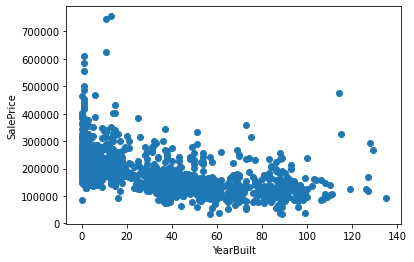

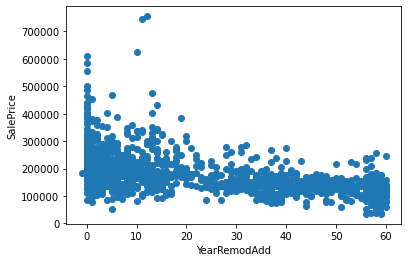

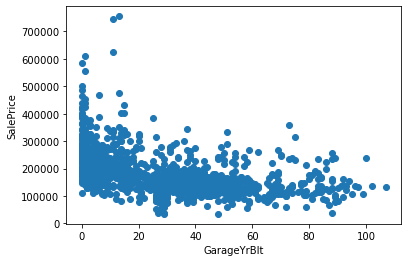

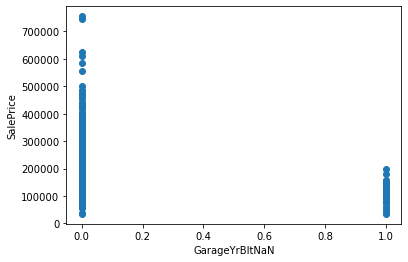

In [43]:
#Here we are comparing the all years feature with sale price
for feature in year_features:
    if feature!='YrSold':
        data=train.copy()
        #Comparing difference between year variables with Sale Price:
        train[feature]=data['YrSold']-data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

From above graphs we observed that how Sale price is dependant on year variables.
The sale price of houses is higher with recently build house than old constructed. Other information relation to Sale Price gives more information.

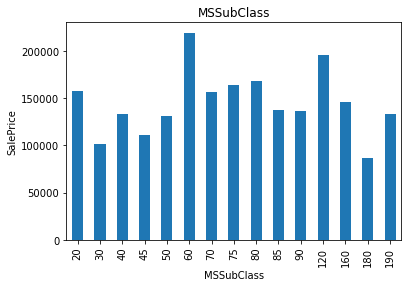

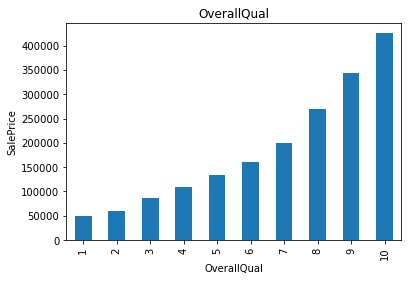

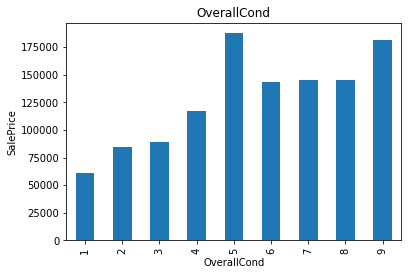

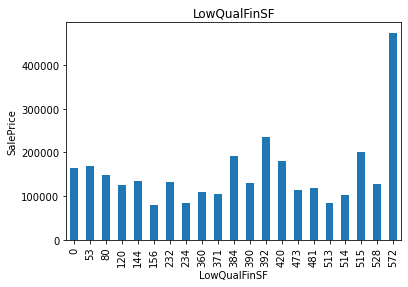

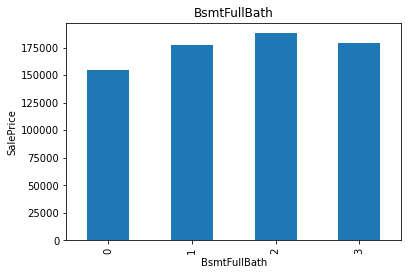

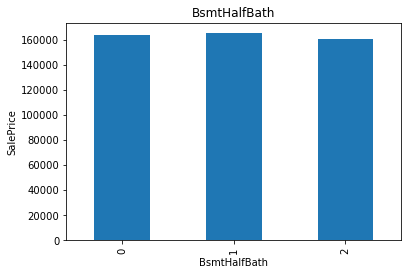

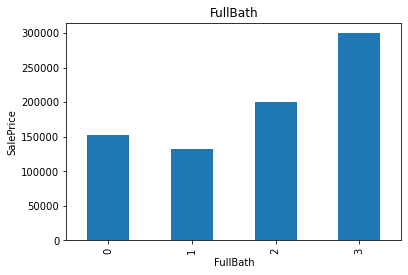

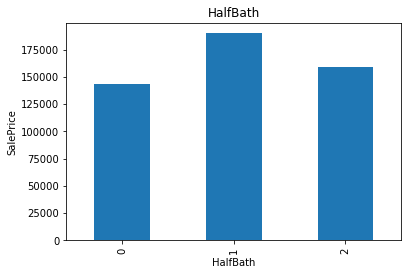

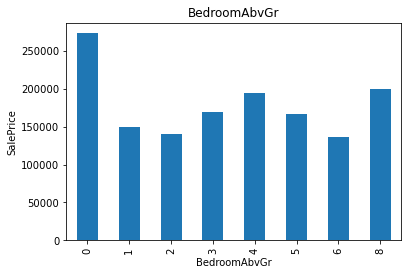

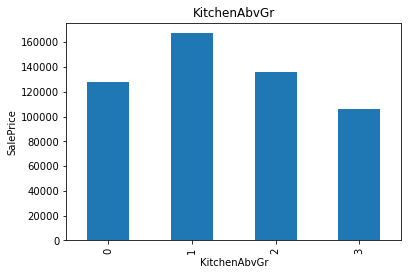

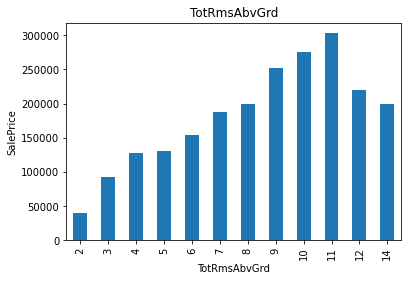

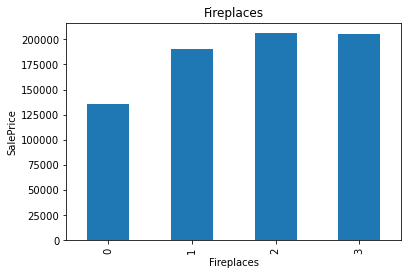

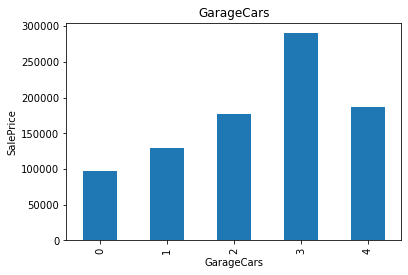

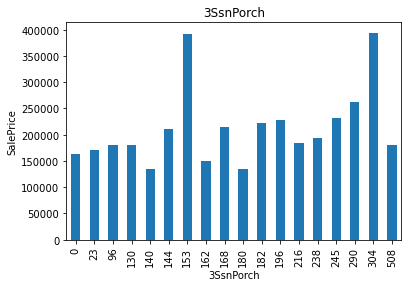

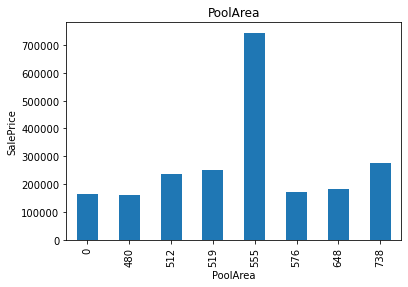

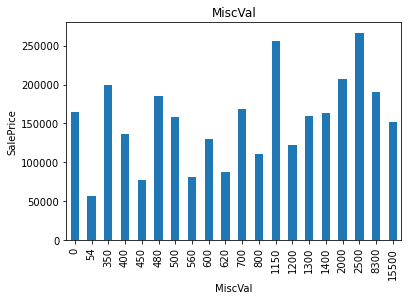

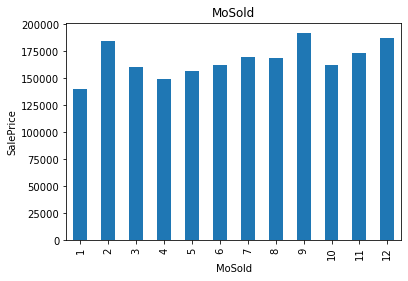

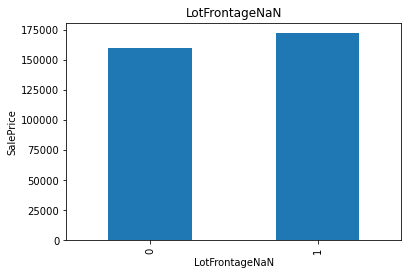

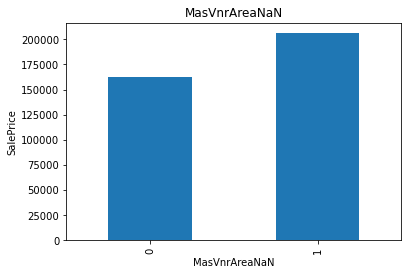

In [44]:
#Analysing graphs for discrete features
for feature in discrete_features:
    data=train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

With above graphs we can say that there is relationship between discrete variables and sale price like Overall quality showing exponential relationship to saleprice.
Monotonic relationship, uniform and non uniform relationship relationships with sale price. Thus this visualization giving lots of information.

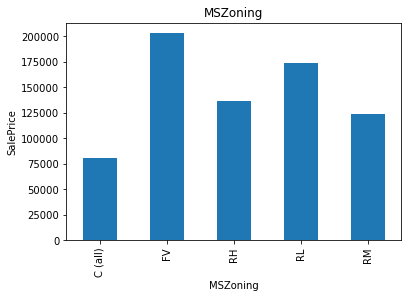

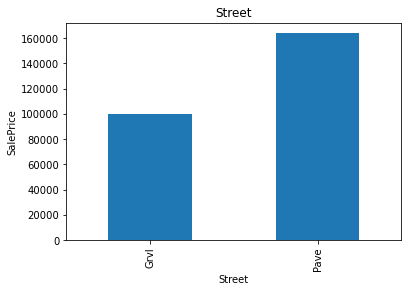

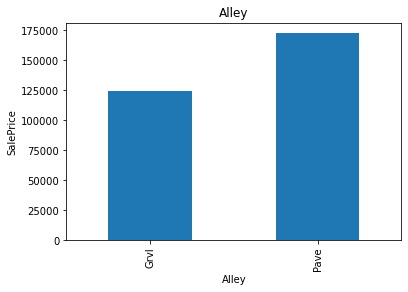

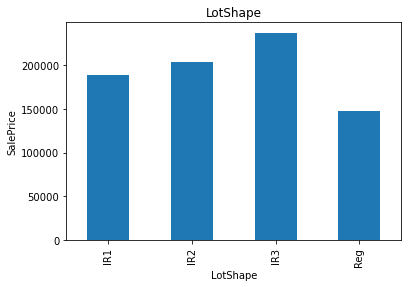

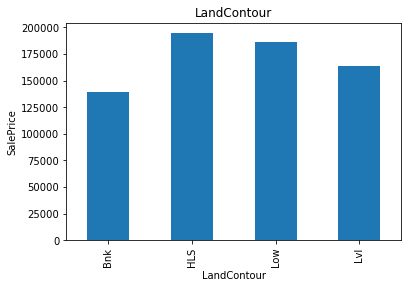

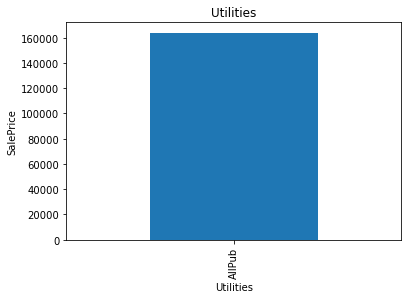

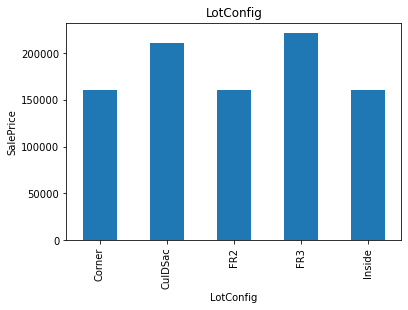

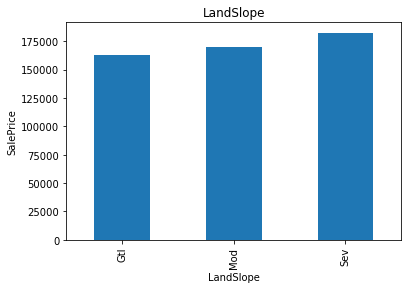

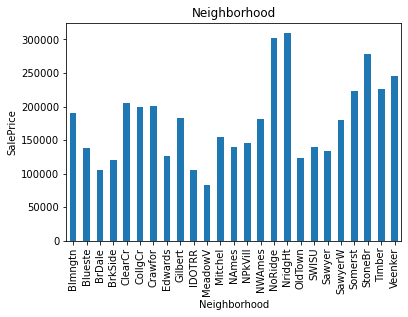

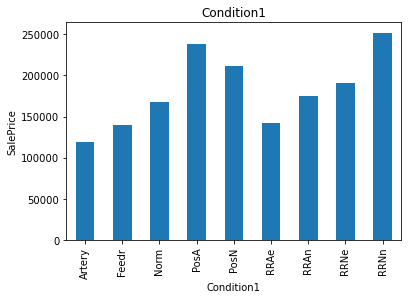

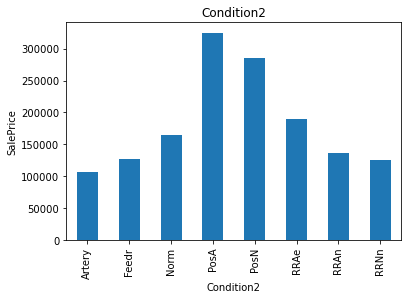

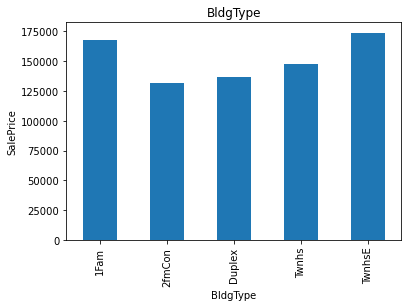

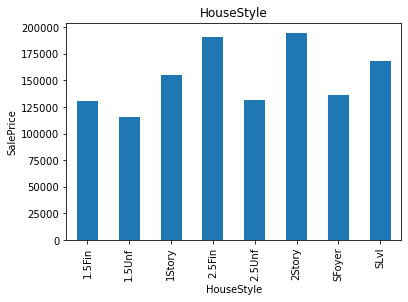

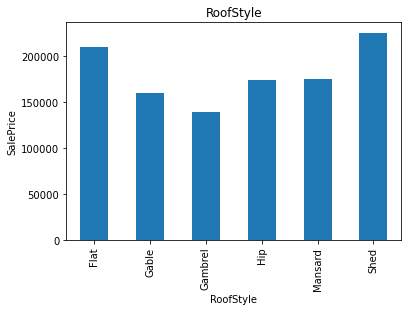

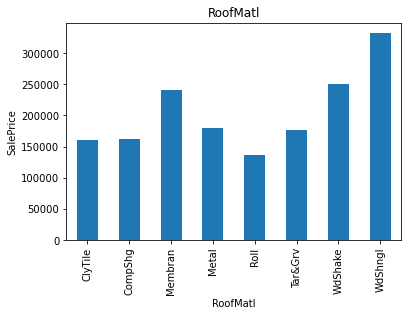

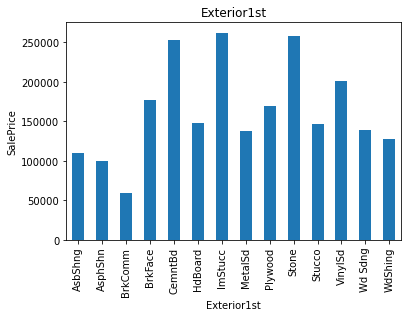

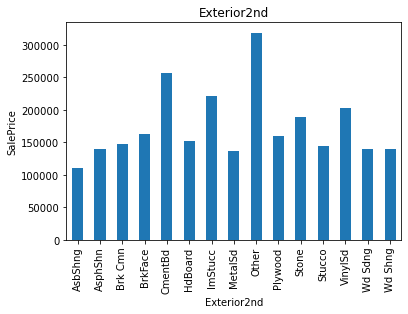

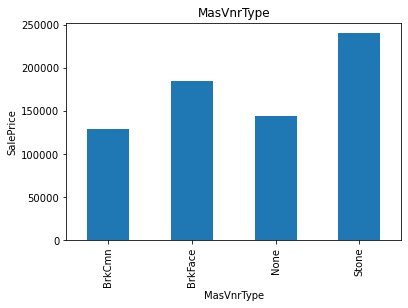

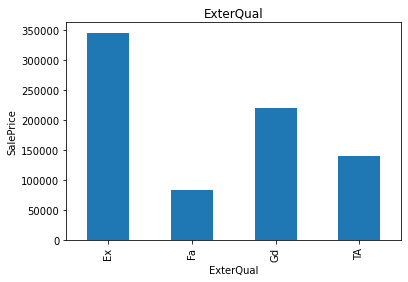

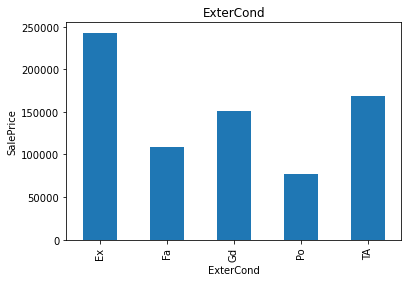

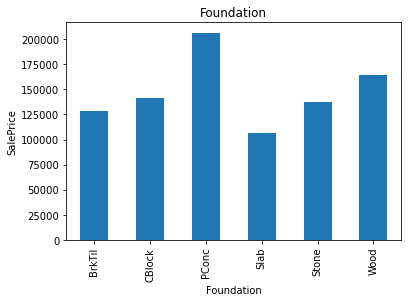

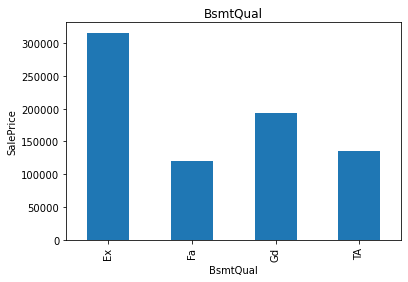

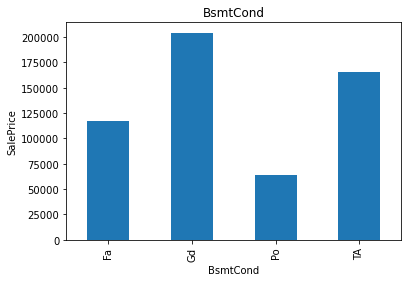

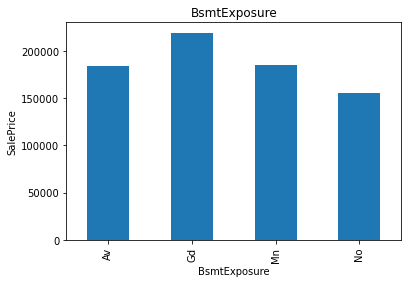

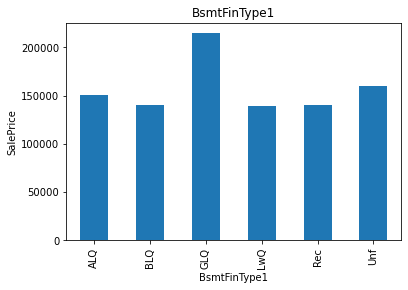

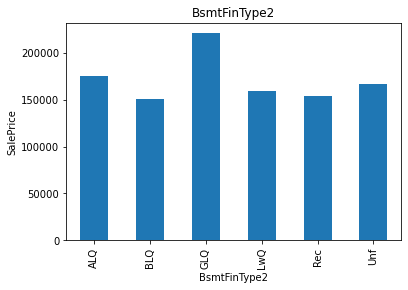

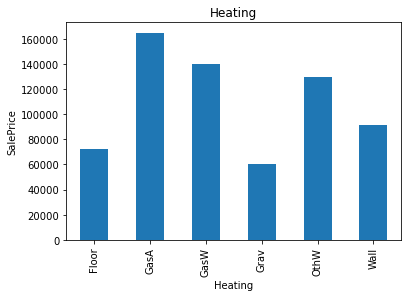

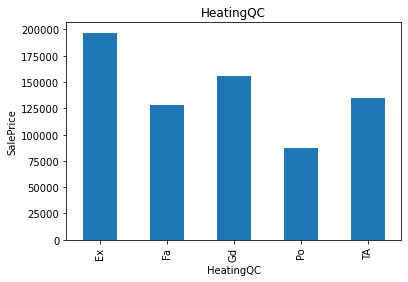

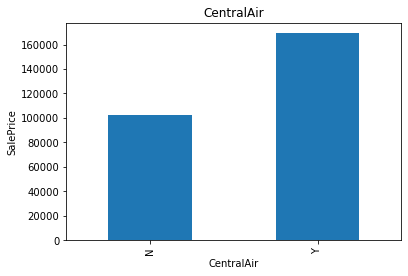

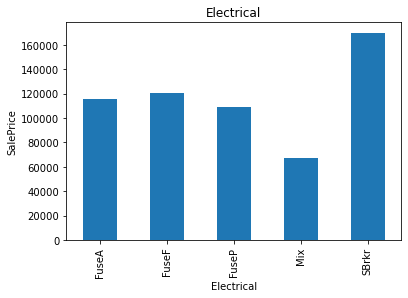

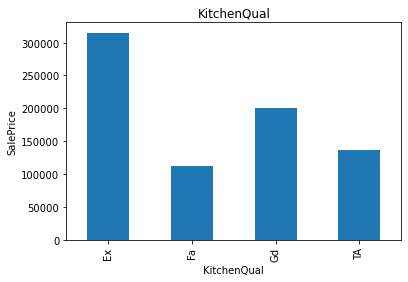

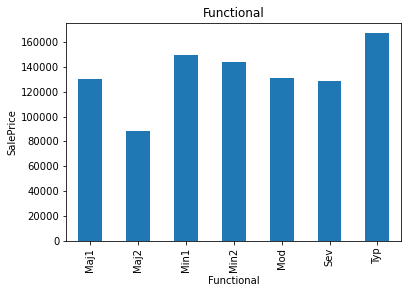

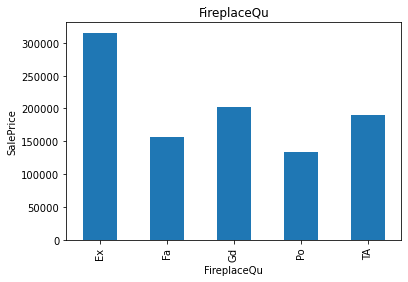

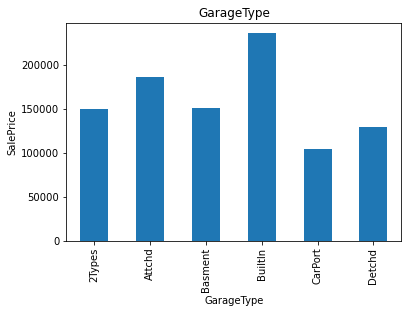

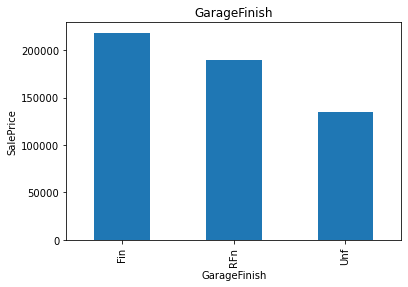

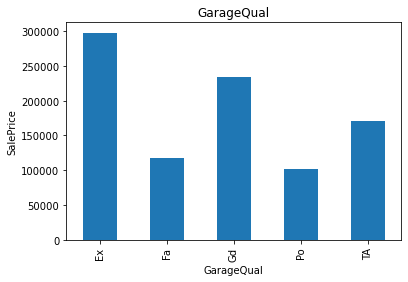

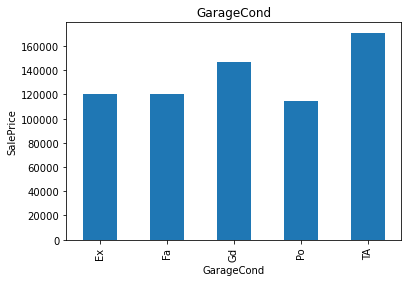

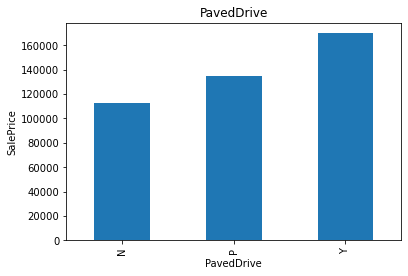

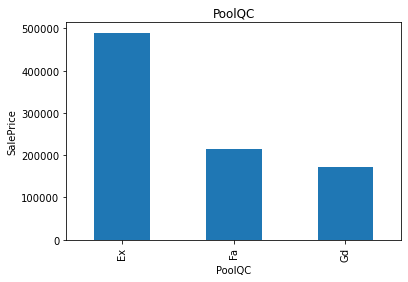

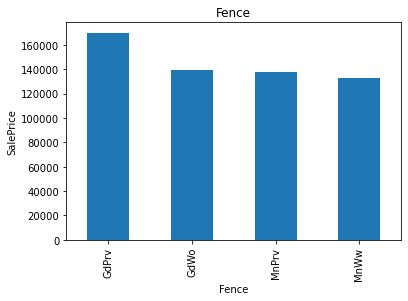

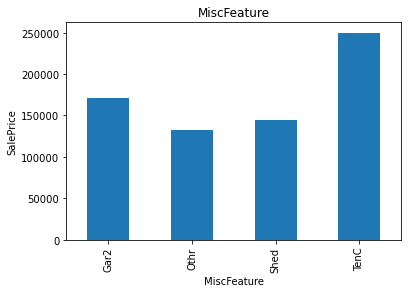

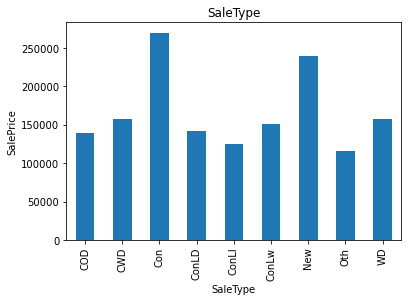

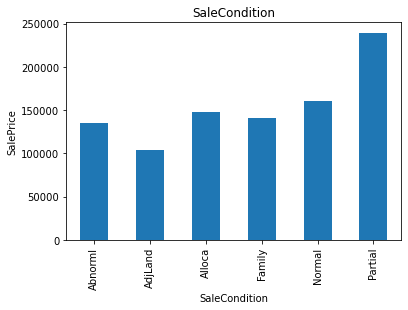

In [45]:
#Analysing relationship between categorical features and sale price
for feature in cat_features:
    data=train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

With all above visualization we have analysed the house price relationship with all categorical features.

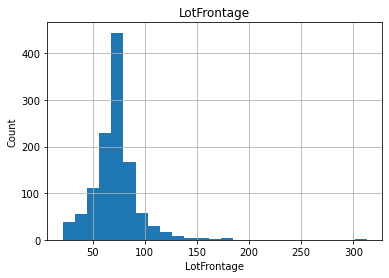

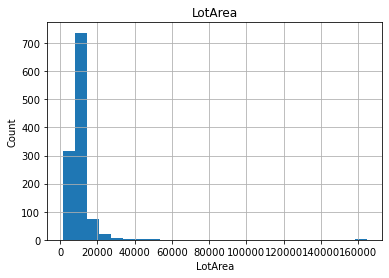

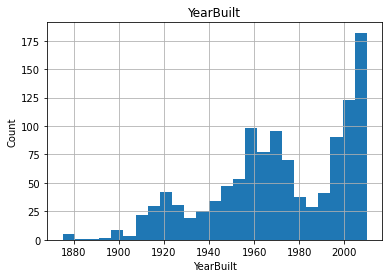

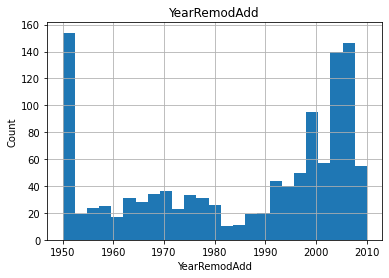

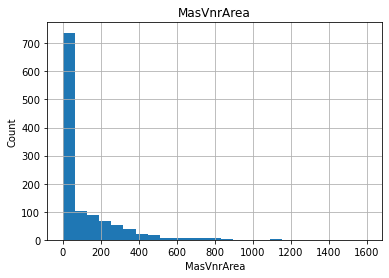

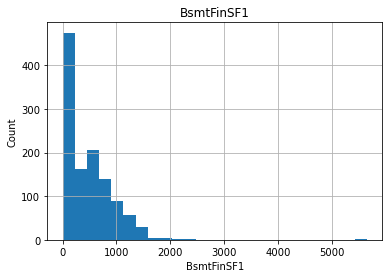

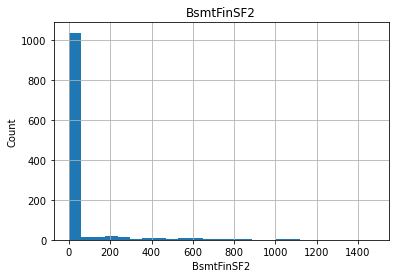

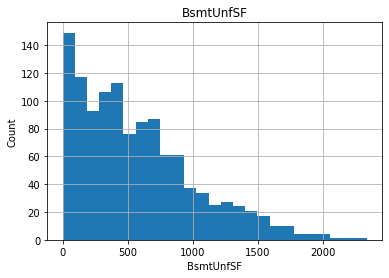

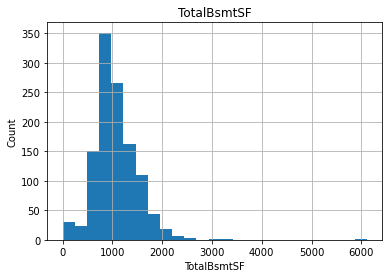

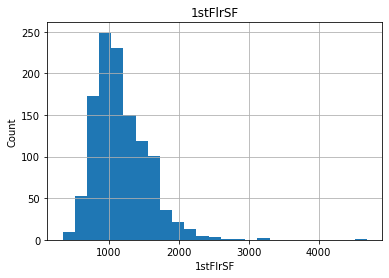

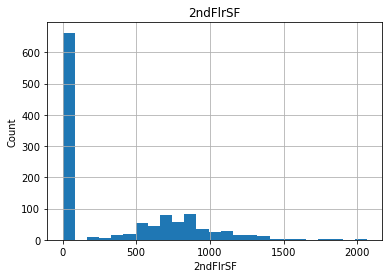

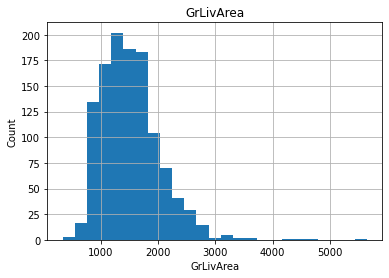

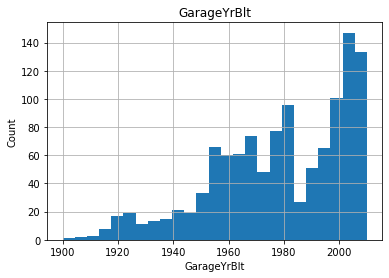

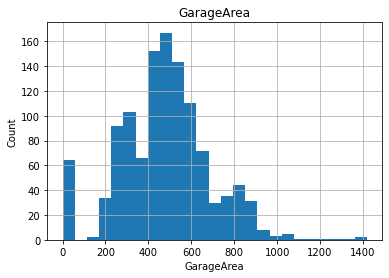

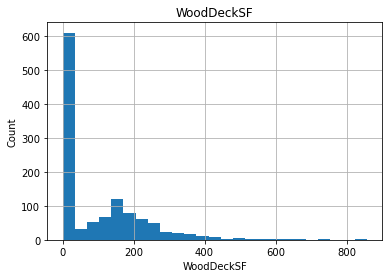

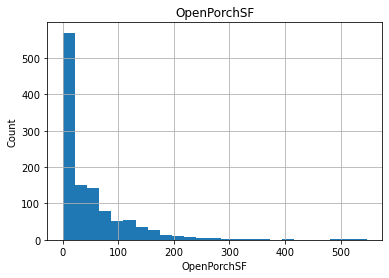

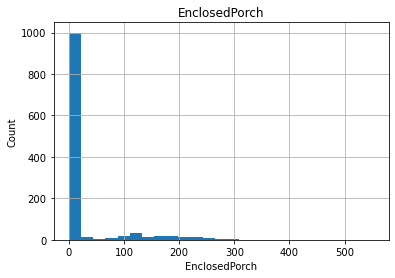

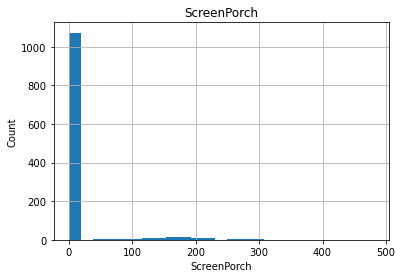

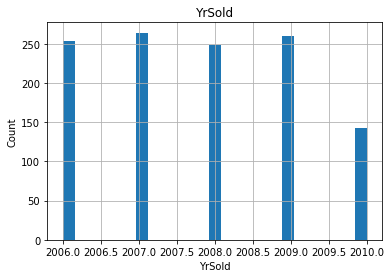

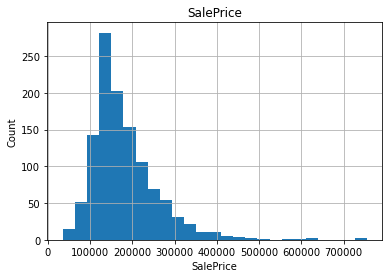

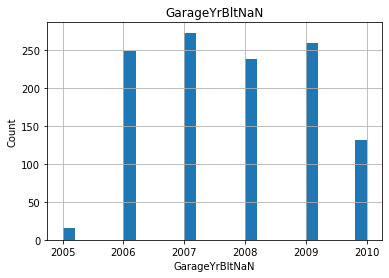

In [46]:
#Analysing house price relationship with continous features
for feature in countinous_features:
    data=train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()
   

With above visualization on continous features we observed that few features have gaussion distribution which confirms that data is skewed.
Thus we will convert it into normal distribution feature engineering to get  better modelling.

In [47]:
#Checking Correlation
train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontageNaN,MasVnrAreaNaN,GarageYrBltNaN
Id,1.000000,0.004259,-0.006165,-0.029212,-0.036965,0.039761,-0.016942,-0.018590,-0.061397,0.003868,0.005269,-0.019494,-0.013812,0.009647,-0.029671,-0.070180,-0.024325,0.023027,-0.043572,-0.015187,-0.028512,0.009376,0.001216,-0.001613,-0.024175,-0.000585,0.007549,0.010048,-0.027498,-0.013642,0.004885,-0.021773,0.005169,6.583156e-02,0.001304,0.023479,-0.008853,-0.023897,1.158714e-02,0.021921,-0.007453
MSSubClass,0.004259,1.000000,-0.336234,-0.124151,0.070462,-0.056978,0.023988,0.056618,0.028215,-0.052236,-0.062403,-0.134170,-0.214042,-0.227927,0.300366,0.053737,0.086448,0.004556,0.008207,0.140807,0.168423,-0.013283,0.283506,0.051179,-0.035792,0.074640,-0.027639,-0.092408,-0.022609,0.017468,-0.004252,-0.043210,-0.013291,9.583106e-03,-0.023503,-0.016015,-0.038595,-0.060775,-2.340530e-02,-0.009890,-0.053201
LotFrontage,-0.006165,-0.336234,1.000000,0.296790,0.229981,-0.047851,0.112000,0.089513,0.188273,0.227732,0.001253,0.115628,0.356180,0.402864,0.089816,0.008087,0.374000,0.092807,0.001375,0.171842,0.047149,0.236946,-0.002082,0.318941,0.228494,0.054459,0.260224,0.322750,0.087267,0.151044,0.021103,0.050499,0.030440,1.959729e-01,-0.002830,0.022579,-0.004162,0.323851,-1.704742e-02,0.010557,0.013312
LotArea,-0.029212,-0.124151,0.296790,1.000000,0.107188,0.017513,0.005506,0.027228,0.120192,0.221851,0.056656,0.006600,0.259733,0.312843,0.059803,-0.001915,0.281360,0.142387,0.059282,0.123197,0.007271,0.117351,-0.013075,0.184546,0.285983,-0.036133,0.158313,0.195162,0.216720,0.093080,-0.007446,0.025794,0.025256,9.710684e-02,0.051679,0.015141,-0.035399,0.249499,1.536092e-01,0.017998,-0.021275
OverallQual,-0.036965,0.070462,0.229981,0.107188,1.000000,-0.083167,0.575800,0.555945,0.403985,0.219643,-0.040893,0.308676,0.528285,0.458758,0.316624,-0.039295,0.599700,0.101732,-0.030702,0.548824,0.296134,0.099639,-0.178220,0.432579,0.390067,0.506869,0.596322,0.566782,0.227137,0.341030,-0.098374,0.045919,0.059387,7.224748e-02,-0.025786,0.090638,-0.048759,0.789185,-4.675101e-02,0.066009,-0.002973
OverallCond,0.039761,-0.056978,-0.047851,0.017513,-0.083167,1.000000,-0.377731,0.080669,-0.135133,-0.028810,0.044336,-0.146384,-0.162481,-0.134420,0.036668,0.041877,-0.065006,-0.039680,0.091016,-0.171931,-0.052125,0.028393,-0.076047,-0.039952,-0.013632,-0.302585,-0.161996,-0.126021,0.012290,-0.024899,0.056074,0.040476,0.069463,-3.602917e-03,0.075178,0.005519,0.055517,-0.065642,1.669836e-02,-0.051041,0.062215
YearBuilt,-0.016942,0.023988,0.112000,0.005506,0.575800,-0.377731,1.000000,0.592829,0.318562,0.227933,-0.027682,0.155559,0.386265,0.279450,0.011834,-0.189044,0.198644,0.164983,-0.028161,0.471264,0.243227,-0.080639,-0.167869,0.095476,0.134313,0.779860,0.525346,0.473216,0.204830,0.191069,-0.373544,0.037079,-0.058760,6.408132e-03,-0.030008,0.031754,-0.013976,0.514408,3.744730e-02,0.070124,0.023368
YearRemodAdd,-0.018590,0.056618,0.089513,0.027228,0.555945,0.080669,0.592829,1.000000,0.178583,0.114430,-0.044694,0.174732,0.280720,0.233384,0.155102,-0.072526,0.295048,0.104643,-0.011375,0.444446,0.194943,-0.035847,-0.139943,0.206923,0.118378,0.612726,0.428325,0.387744,0.197410,0.238755,-0.193574,0.064763,-0.046220,6.874453e-03,-0.001199,0.024663,0.033265,0.507831,-4.264534e-02,0.060700,0.054657
MasVnrArea,-0.061397,0.028215,0.188273,0.120192,0.403985,-0.135133,0.318562,0.178583,1.000000,0.263377,-0.064685,0.108974,0.362330,0.334512,0.172136,-0.070026,0.384386,0.084498,0.014974,0.264357,0.197831,0.091339,-0.039438,0.277737,0.241040,0.245879,0.340100,0.363537,0.152083,0.127876,-0.102142,0.019123,0.047375,1.383564e-02,-0.027263,

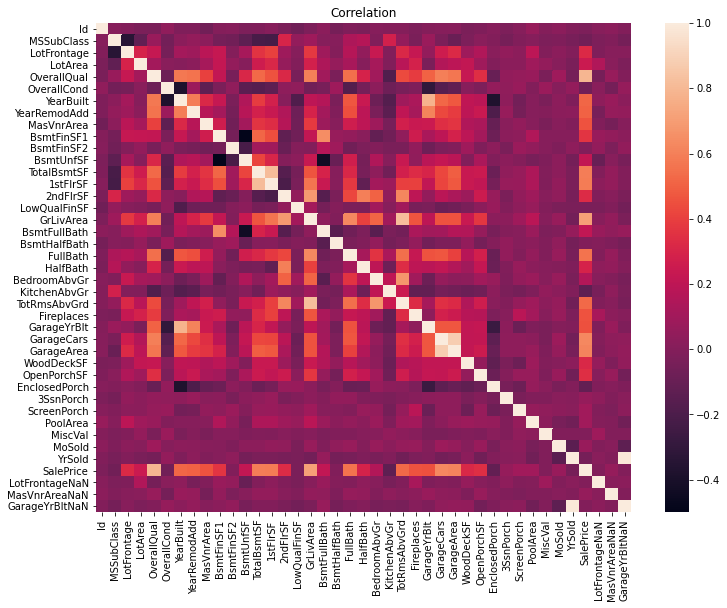

In [48]:
#Visualizing correlation
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(train.corr())
plt.title("Correlation")
plt.show()

We can see that there are many correlated variables in our dataset. We notice that Garage Cars and Garage Area have high positive correlation which is reasonable because when the garage area increases, its car capacity increases too. 
We see also that Gr Liv Area and TotRms AbvGrd are highly positively correlated which also makes sense because when living area above ground increases, it is expected for the rooms above ground to increase too.
For negative correlation, we can see that Bsmt Unf SF is negatively correlated with BsmtFin SF 1, and that makes sense because when we have more unfinished area, this means that we have less finished area. We note also that 
Bsmt Unf SF is negatively correlated with Bsmt Full Bath which is reasonable too.

# Feature Engineering

In [49]:
#Replacing the numerical variables as its are skewed so we'll use log normal distribution from train dataset
#Here we are taking only which are not in '0' value or skewed values
num_features=['LotFrontage','LotArea','1stFlrSF','GrLivArea','SalePrice']
for feature in num_features:
    train[feature]=np.log(train[feature])




In [50]:
#Replacing the numerical variables as its are skewed so we'll use log normal distribution from train dataset
#Here we are taking only which are not in '0' value or skewed values
num_feature=['LotFrontage','LotArea','1stFlrSF','GrLivArea']
for feature in num_feature:
    test[feature]=np.log(test[feature])

In [51]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontageNaN,MasVnrAreaNaN,GarageYrBltNaN
0,127,120,RL,4.248495,8.502689,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,6.864848,0,0,6.864848,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,11.759786,1,0,2007
1,889,20,RL,4.553877,9.671871,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,7.703910,0,0,7.703910,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,12.498742,0,0,2007
2,793,60,RL,4.521789,9.202308,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,7.027315,886,0,7.607381,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,12.505399,0,0,2007
3,110,20,RL,4.653960,9.371694,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,7.519692,0,0,7.519692,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,12.154779,0,0,2010
4,422,20,RL,4.248495,9.719264,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,7.379008,0,0,7.379008,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,12.278393,1,0,2009


In [52]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,4.454347,9.557964,Pave,None,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2,1,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,7.561122,0,0,7.561122,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,None,None,None,0,7,2007,WD,Normal
1,1018,120,RL,4.189655,8.668024,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,25,25,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,7.215240,0,0,7.215240,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,25.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,None,None,None,0,8,2009,COD,Abnorml
2,929,20,RL,4.174387,9.379070,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,8,8,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,7.488853,0,0,7.488853,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,8.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,None,None,None,0,6,2009,WD,Normal
3,1148,70,RL,4.317488,9.392662,Pave,None,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,68,59,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,6.756932,704,0,7.355002,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,68.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,7,2009,WD,Normal
4,1227,60,RL,4.454347,9.588640,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,1,1,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,6.795706,1039,0,7.566828,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,1.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,None,None,None,0,1,2008,WD,Normal


In [53]:
#Handling the Categorial Feature
#we'll remove the variables that are present less than 1% of observation
categorical_features=[feature for feature in train.columns if train[feature].dtype=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [54]:
#Handling the Categorial Feature
#we'll remove the variables that are present less than 1% of observation
categorical_feature=[feature for feature in test.columns if test[feature].dtype=='O']
categorical_feature

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [55]:
for feature in categorical_features:
    temp=train.groupby(feature)['SalePrice'].count()/len(train)
    temp_df=temp[temp>0.01].index
    train[feature]=np.where(train[feature].isin(temp_df),train[feature],'RareVar')

In [56]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontageNaN,MasVnrAreaNaN,GarageYrBltNaN
0,127,120,RL,4.248495,8.502689,Pave,RareVar,IR1,Lvl,AllPub,Inside,Gtl,RareVar,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,6.864848,0,0,6.864848,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,RareVar,RareVar,RareVar,0,2,2007,WD,Normal,11.759786,1,0,2007
1,889,20,RL,4.553877,9.671871,Pave,RareVar,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,RareVar,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,7.703910,0,0,7.703910,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,RareVar,RareVar,RareVar,0,10,2007,WD,Normal,12.498742,0,0,2007
2,793,60,RL,4.521789,9.202308,Pave,RareVar,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,7.027315,886,0,7.607381,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,RareVar,RareVar,RareVar,0,6,2007,WD,Normal,12.505399,0,0,2007
3,110,20,RL,4.653960,9.371694,Pave,RareVar,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,7.519692,0,0,7.519692,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,RareVar,MnPrv,RareVar,0,1,2010,COD,Normal,12.154779,0,0,2010
4,422,20,RL,4.248495,9.719264,Pave,RareVar,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,7.379008,0,0,7.379008,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,RareVar,RareVar,RareVar,0,6,2009,WD,Normal,12.278393,1,0,2009


In [57]:
for feature in categorical_feature:
    temp=test.groupby(feature).count()/len(test)
    temp_df=temp[temp>0.01].index
    test[feature]=np.where(test[feature].isin(temp_df),test[feature],'RareVar')

In [58]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,4.454347,9.557964,Pave,None,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2,1,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,7.561122,0,0,7.561122,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,None,None,None,0,7,2007,WD,Normal
1,1018,120,RL,4.189655,8.668024,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,25,25,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,7.215240,0,0,7.215240,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,25.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,None,None,None,0,8,2009,COD,Abnorml
2,929,20,RL,4.174387,9.379070,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,8,8,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,7.488853,0,0,7.488853,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,8.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,None,None,None,0,6,2009,WD,Normal
3,1148,70,RL,4.317488,9.392662,Pave,None,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,68,59,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,6.756932,704,0,7.355002,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,68.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,7,2009,WD,Normal
4,1227,60,RL,4.454347,9.588640,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,1,1,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,6.795706,1039,0,7.566828,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,1.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,None,None,None,0,1,2008,WD,Normal


In [59]:
#Getting all categorical variables into numerics
for feature in categorical_features:
    label_ordered=train.groupby([feature])['SalePrice'].mean().sort_values().index
    label_ordered={k:i for i,k in enumerate(label_ordered,0)}
    train[feature]=train[feature].map(label_ordered)

In [60]:
#Getting all categorical variables into numerics
for feature in categorical_feature:
    labels_ordered=test.groupby([feature]).mean().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    test[feature]=test[feature].map(labels_ordered)

In [61]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontageNaN,MasVnrAreaNaN,GarageYrBltNaN
0,127,120,3,4.248495,8.502689,1,2,1,1,0,1,1,4,2,1,4,3,6,5,1976,1976,1,0,7,6,1,0.0,1,3,2,3,2,1,4,120,4,0,958,1078,2,2,1,3,6.864848,0,0,6.864848,0,0,2,0,2,1,1,5,4,1,3,3,1977.0,2,2,440,2,2,2,0,205,0,0,0,0,0,2,1,0,2,2007,2,4,11.759786,1,0,2007
1,889,20,3,4.553877,9.671871,1,2,1,1,0,1,0,7,2,1,3,3,8,6,1970,1970,3,1,1,2,1,0.0,2,2,4,2,3,4,4,351,2,823,1043,2217,2,4,1,3,7.703910,0,0,7.703910,1,0,2,0,4,1,2,8,4,1,3,3,1970.0,1,2,621,2,2,2,81,207,0,0,224,0,0,2,1,0,10,2007,2,4,12.498742,0,0,2007
2,793,60,3,4.521789,9.202308,1,2,1,1,0,4,1,20,2,1,3,6,7,5,1996,1997,1,0,2,1,1,0.0,2,3,4,3,2,3,6,862,4,0,255,1117,2,4,1,3,7.027315,886,0,7.607381,1,0,2,1,3,1,1,8,4,1,3,3,1997.0,1,2,455,2,2,2,180,130,0,0,0,0,0,2,1,0,6,2007,2,4,12.505399,0,0,2007
3,110,20,3,4.653960,9.371694,1,2,1,1,0,1,1,10,2,1,3,3,6,6,1977,1977,2,0,7,6,2,480.0,1,3,2,3,2,1,3,705,4,0,1139,1844,2,4,1,3,7.519692,0,0,7.519692,0,0,2,0,3,1,1,7,4,1,3,3,1977.0,2,2,546,2,2,2,0,122,0,0,0,0,0,1,1,0,1,2010,0,4,12.154779,0,0,2010
4,422,20,3,4.248495,9.719264,1,2,1,1,0,0,1,10,2,1,3,3,6,7,1977,2000,1,0,10,10,4,126.0,2,3,2,3,2,1,4,1246,4,0,356,1602,2,3,1,3,7.379008,0,0,7.379008,0,1,2,0,3,1,2,8,4,1,3,3,1977.0,3,2,529,2,2,2,240,0,0,0,0,0,0,2,1,0,6,2009,2,4,12.278393,1,0,2009


In [62]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,2,4.454347,9.557964,1,1,0,1,0,0,0,21,2,0,0,2,9,5,2,1,3,0,9,11,4,200.0,2,3,2,0,3,1,2,1249,6,0,673,1922,0,0,1,4,7.561122,0,0,7.561122,1,0,2,0,3,1,2,8,5,1,2,1,2.0,0,3,676,5,5,2,178,51,0,0,0,0,0,4,0,0,7,2007,5,2
1,1018,120,2,4.189655,8.668024,1,1,0,3,0,1,0,21,2,0,4,2,8,5,25,25,1,0,5,5,2,0.0,2,3,1,2,3,0,2,1036,6,0,184,1220,0,2,1,4,7.215240,0,0,7.215240,1,0,1,0,1,1,2,4,5,1,0,1,25.0,2,2,565,5,5,2,63,0,0,0,0,0,0,4,0,0,8,2009,0,0
2,929,20,2,4.174387,9.379070,1,1,3,3,0,4,0,4,2,0,0,2,8,5,8,8,3,0,9,11,2,0.0,2,3,2,2,3,0,6,0,6,0,1753,1753,0,0,1,4,7.488853,0,0,7.488853,0,0,2,0,3,1,0,7,5,1,5,1,8.0,2,2,522,5,5,2,202,151,0,0,0,0,0,4,0,0,6,2009,5,2
3,1148,70,2,4.317488,9.392662,1,1,3,0,0,4,0,5,2,0,0,5,7,7,68,59,1,0,6,7,2,0.0,3,3,1,4,3,3,5,275,6,0,429,704,0,0,1,4,6.756932,704,0,7.355002,0,0,1,1,3,1,1,7,5,1,2,1,68.0,3,1,234,5,5,2,0,0,0,0,0,0,0,4,0,0,7,2009,5,2
4,1227,60,2,4.454347,9.588640,1,1,0,3,0,1,0,20,1,0,0,5,6,5,1,1,1,0,9,11,4,74.0,2,3,2,2,3,2,6,0,6,0,894,894,0,0,1,4,6.795706,1039,0,7.566828,0,0,2,1,4,1,2,9,5,1,2,3,1.0,0,3,668,5,5,2,100,18,0,0,0,0,0,4,0,0,1,2008,5,2


# Feature Scaling

In [63]:
#As we have different feaures measuring in different scales thus before perform modelling its important to perform Feature Scaling
feature_scales=[feature for feature in train.columns if feature not in ['Id','SalePrice']]  #We'll be performing feature scaling on this new variable skipping 'Id'& 'SalePrice'
from sklearn.preprocessing import MinMaxScaler
scaler_train=MinMaxScaler()
scaler_train.fit(train[feature_scales])

MinMaxScaler()

In [64]:
#As we have different feaures measuring in different scales thus before perform modelling its important to perform Feature Scaling
feature_scale=[feature for feature in test.columns if feature not in ['Id']]  #We'll be performing feature scaling on this new variable skipping 'Id'
from sklearn.preprocessing import MinMaxScaler
scaler_test=MinMaxScaler()
scaler_test.fit(test[feature_scale])

MinMaxScaler()

In [65]:

scaler_train.transform(train[feature_scales])

array([[0.58823529, 0.75      , 0.44563844, ..., 1.        , 0.        ,
        0.4       ],
       [0.        , 0.75      , 0.55867239, ..., 0.        , 0.        ,
        0.4       ],
       [0.23529412, 0.75      , 0.54679523, ..., 0.        , 0.        ,
        0.4       ],
       ...,
       [0.82352941, 0.75      , 0.0494253 , ..., 0.        , 0.        ,
        0.8       ],
       [0.29411765, 0.        , 0.32109662, ..., 0.        , 0.        ,
        0.6       ],
       [0.23529412, 0.75      , 0.44563844, ..., 1.        , 0.        ,
        0.2       ]])

In [66]:
scaler_test.transform(test[feature_scale])

array([[0.        , 0.66666667, 0.71706202, ..., 0.25      , 1.        ,
        0.66666667],
       [0.58823529, 0.66666667, 0.58243468, ..., 0.75      , 0.        ,
        0.        ],
       [0.        , 0.66666667, 0.57466937, ..., 0.75      , 1.        ,
        0.66666667],
       ...,
       [0.        , 0.66666667, 0.612362  , ..., 1.        , 1.        ,
        0.66666667],
       [0.17647059, 1.        , 0.44122623, ..., 0.        , 1.        ,
        0.66666667],
       [0.82352941, 1.        , 0.        , ..., 0.        , 1.        ,
        0.66666667]])

In [67]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([train[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler_train.transform(train[feature_scales]), columns=feature_scales)],
                    axis=1)

In [68]:
data2 = pd.concat([test[['Id']].reset_index(drop=True),
                    pd.DataFrame(scaler_test.transform(test[feature_scale]), columns=feature_scale)],
                    axis=1)

In [69]:
#after applying feature scaling
data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontageNaN,MasVnrAreaNaN,GarageYrBltNaN
0,127,11.759786,0.588235,0.75,0.445638,0.275238,1.0,1.0,0.333333,0.333333,0.0,0.25,0.5,0.20,0.4,1.0,1.00,0.5,0.555556,0.500,0.748148,0.433333,0.333333,0.0,0.7,0.6,0.25,0.00000,0.333333,1.000000,0.5,0.75,0.666667,0.25,0.666667,0.021262,0.666667,0.000000,0.410103,0.176432,1.0,0.50,1.0,1.0,0.398758,0.000000,0.0,0.372749,0.000000,0.0,0.666667,0.0,0.250,0.333333,0.333333,0.250000,1.0,0.333333,0.6,0.75,0.700000,0.666667,0.5,0.310296,1.0,1.0,1.0,0.000000,0.374771,0.0,0.0,0.000000,0.0,0.0,0.666667,1.0,0.0,0.090909,0.25,0.666667,0.8,1.0,0.0,0.4
1,889,12.498742,0.000000,0.75,0.558672,0.516729,1.0,1.0,0.333333,0.333333,0.0,0.25,0.0,0.35,0.4,1.0,0.75,0.5,0.777778,0.625,0.703704,0.333333,1.000000,1.0,0.1,0.2,0.25,0.00000,0.666667,0.666667,1.0,0.50,1.000000,1.00,0.666667,0.062190,0.333333,0.558345,0.446490,0.362848,1.0,1.00,1.0,1.0,0.716287,0.000000,0.0,0.669568,0.333333,0.0,0.666667,0.0,0.500,0.333333,0.666667,0.500000,1.0,0.333333,0.6,0.75,0.636364,0.333333,0.5,0.437941,1.0,1.0,1.0,0.094516,0.378428,0.0,0.0,0.466667,0.0,0.0,0.666667,1.0,0.0,0.818182,0.25,0.666667,0.8,0.0,0.0,0.4
2,793,12.505399,0.235294,0.75,0.546795,0.419742,1.0,1.0,0.333333,0.333333,0.0,1.00,0.5,1.00,0.4,1.0,0.75,1.0,0.666667,0.500,0.896296,0.783333,0.333333,0.0,0.2,0.1,0.25,0.00000,0.666667,1.000000,1.0,0.75,0.666667,0.75,1.000000,0.152729,0.666667,0.000000,0.109161,0.182815,1.0,1.00,1.0,1.0,0.460241,0.429056,0.0,0.635421,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.500000,1.0,0.333333,0.6,0.75,0.881818,0.333333,0.5,0.320874,1.0,1.0,1.0,0.210035,0.237660,0.0,0.0,0.000000,0.0,0.0,0.666667,1.0,0.0,0.454545,0.25,0.666667,0.8,0.0,0.0,0.4
3,110,12.154779,0.000000,0.75,0.595717,0.454728,1.0,1.0,0.333333,0.333333,0.0,0.25,0.5,0.50,0.4,1.0,0.75,0.5,0.555556,0.625,0.755556,0.450000,0.666667,0.0,0.7,0.6,0.50,0.30000,0.333333,1.000000,0.5,0.75,0.666667,0.25,0.500000,0.124911,0.666667,0.000000,0.487586,0.301800,1.0,1.00,1.0,1.0,0.646573,0.000000,0.0,0.604401,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.6,0.75,0.700000,0.666667,0.5,0.385049,1.0,1.0,1.0,0.000000,0.223035,0.0,0.0,0.000000,0.0,0.0,0.333333,1.0,0.0,0.000000,1.00,0.000000,0.8,0.0,0.0,1.0
4,422,12.278393,0.000000,0.75,0.445638,0.526518,1.0,1.0,0.333333,0.333333,0.0,0.00,0.5,0.50,0.4,1.0,0.75,0.5,0.555556,0.750,0.755556,0.833333,0.333333,0.0,1.0,1.0,1.00,0.07875,0.666667,1.000000,0.5,0.75,0.666667,0.25,0.666667,0.220765,0.666667,0.000000,0.152397,0.262193,1.0,0.75,1.0,1.0,0.593333,0.000000,0.0,0.554633,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.666667,0.500000,1.0,0.333333,0.6,0.75,0.700000,1.000000,0.5,0.373061,1.0,1.0,1.0,0.280047,0.000000,0.0,0.0,0.000000,0.0,0.0,0.666667,1.0,0.0,0.454545,0.75,0.666667,0.8,1.0,0.0,0.8


In [70]:
data2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,0.000000,0.666667,0.717062,0.450091,1.0,0.5,0.0,0.333333,0.0,0.00,0.0,0.913043,0.285714,0.0,0.0,0.285714,0.857143,0.333333,0.014706,0.016667,0.75,0.0,0.818182,0.846154,1.0,0.193986,0.666667,1.0,0.4,0.0,1.0,0.25,0.333333,0.706848,1.0,0.0,0.347804,0.621202,0.0,0.000000,1.0,1.0,0.880474,0.000000,0.0,0.691166,0.5,0.0,0.666667,0.0,0.500000,0.0,0.666667,0.555556,1.0,0.5,0.4,0.166667,0.000995,0.000000,0.75,0.642586,1.0,1.0,1.0,0.244505,0.122010,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.545455,0.25,1.0,0.666667
1,1018,0.588235,0.666667,0.582435,0.270274,1.0,0.5,0.0,1.000000,0.0,0.25,0.0,0.913043,0.285714,0.0,1.0,0.285714,0.714286,0.333333,0.183824,0.416667,0.25,0.0,0.454545,0.384615,0.5,0.000000,0.666667,1.0,0.2,0.5,1.0,0.00,0.333333,0.586304,1.0,0.0,0.095090,0.394312,0.0,0.666667,1.0,1.0,0.695031,0.000000,0.0,0.508298,0.5,0.0,0.333333,0.0,0.166667,0.0,0.666667,0.111111,1.0,0.5,0.0,0.166667,0.012438,0.666667,0.50,0.537072,1.0,1.0,1.0,0.086538,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.636364,0.75,0.0,0.000000
2,929,0.000000,0.666667,0.574669,0.413945,1.0,0.5,1.0,1.000000,0.0,1.00,0.0,0.173913,0.285714,0.0,0.0,0.285714,0.714286,0.333333,0.058824,0.133333,0.75,0.0,0.818182,0.846154,0.5,0.000000,0.666667,1.0,0.4,0.5,1.0,0.00,1.000000,0.000000,1.0,0.0,0.905943,0.566580,0.0,0.000000,1.0,1.0,0.841727,0.000000,0.0,0.652958,0.0,0.0,0.666667,0.0,0.500000,0.0,0.000000,0.444444,1.0,0.5,1.0,0.166667,0.003980,0.666667,0.50,0.496198,1.0,1.0,1.0,0.277473,0.361244,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.454545,0.75,1.0,0.666667
3,1148,0.294118,0.666667,0.647453,0.416691,1.0,0.5,1.0,0.000000,0.0,1.00,0.0,0.217391,0.285714,0.0,0.0,0.714286,0.571429,0.666667,0.500000,0.983333,0.25,0.0,0.545455,0.538462,0.5,0.000000,1.000000,1.0,0.2,1.0,1.0,0.75,0.833333,0.155631,1.0,0.0,0.221705,0.227537,0.0,0.000000,1.0,1.0,0.449311,0.443046,0.0,0.582191,0.0,0.0,0.333333,0.5,0.500000,0.0,0.333333,0.444444,1.0,0.5,0.4,0.166667,0.033831,1.000000,0.25,0.222433,1.0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.545455,0.75,1.0,0.666667
4,1227,0.235294,0.666667,0.717062,0.456289,1.0,0.5,0.0,1.000000,0.0,0.25,0.0,0.869565,0.142857,0.0,0.0,0.714286,0.428571,0.333333,0.007353,0.016667,0.25,0.0,0.818182,0.846154,1.0,0.071775,0.666667,1.0,0.4,0.5,1.0,0.50,1.000000,0.000000,1.0,0.0,0.462016,0.288946,0.0,0.000000,1.0,1.0,0.470099,0.653870,0.0,0.694183,0.0,0.0,0.666667,0.5,0.666667,0.0,0.666667,0.666667,1.0,0.5,0.4,0.500000,0.000498,0.000000,0.75,0.634981,1.0,1.0,1.0,0.137363,0.043062,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.50,1.0,0.666667


# Splitting in x and y

In [71]:
y = data['SalePrice']
X = data.drop(['SalePrice', 'Id'], axis=1)

In [72]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)

# Feature Selection

In [69]:
## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [70]:
# first, I specify the Lasso Regression model, and I select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [71]:
feature_sel_model.get_support()

array([ True,  True, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [72]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))


total features: 82
selected features: 18


In [73]:
selected_feat

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Neighborhood', 'OverallQual',
       'YearRemodAdd', 'BsmtQual', 'BsmtExposure', 'CentralAir', '1stFlrSF',
       'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageCars'],
      dtype='object')

In [74]:
X_train=X_train[selected_feat]

In [75]:

X_train.head()

,MSSubClass,MSZoning,LotArea,Neighborhood,OverallQual,YearRemodAdd,BsmtQual,BsmtExposure,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars
526,0.000000,0.75,0.184889,0.65,0.666667,0.950000,0.75,0.75,1.0,0.504254,0.471364,0.0,0.666667,0.333333,0.8,0.75,1.000000,0.50
998,0.000000,1.00,0.442882,0.80,0.777778,0.933333,0.75,0.75,1.0,0.605879,0.566361,0.0,0.666667,0.000000,0.2,0.75,0.666667,0.75
137,0.000000,0.75,0.383883,0.35,0.444444,0.150000,0.00,0.00,1.0,0.367478,0.343510,0.0,0.333333,0.000000,0.2,0.75,0.666667,0.25
1129,0.058824,0.25,0.345088,0.05,0.444444,0.000000,0.50,0.50,1.0,0.514574,0.481011,0.0,0.000000,0.000000,0.2,0.25,0.333333,0.50
676,0.000000,0.25,0.315892,0.15,0.333333,0.050000,0.25,0.25,0.0,0.389966,0.364531,0.0,0.333333,0.000000,0.2,0.25,0.333333,0.50


Above are the selected features on which we can perform model buildingbut in order to take all features and getting all values we'll be working on all features for model building.

# Prediction & Selecting the Algorithm

# RandomForestRegressor

In [73]:

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(X, y)

RandomForestRegressor(random_state=0)

In [74]:
print("Accuracy-RFC--->",rfr.score(X,y)*100)

Accuracy-RFC---> 98.09089449246842


In [75]:
predictions = rfr.predict(X_test)

In [76]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.003390379322120859


# Gradient Boosting Regressor

In [77]:

from sklearn import linear_model
from sklearn import ensemble

#lr =  ensemble.RandomForestRegressor(n_estimators = 100, oob_score = True, n_jobs = -1,random_state =50,max_features = "sqrt", min_samples_leaf = 50)
#lr = linear_model.LinearRegression()
lr = ensemble.GradientBoostingRegressor()

In [78]:
gbr = lr.fit(X_train, y_train)

In [79]:
print ("Accuracy - GBR-->", gbr.score(X_test, y_test)*100)

Accuracy - GBR--> 88.91150187861814


In [80]:
predictions = gbr.predict(X_test)

In [81]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.01785683259478967


# Linear Regression

In [83]:
from sklearn import linear_model
model = linear_model.LinearRegression()

In [84]:
#Fit the model
model.fit(X_train, y_train)

LinearRegression()

In [85]:
print("Accuracy -->",model.score(X,y)*100)

Accuracy --> 90.00941937539183


Text(0.5, 1.0, 'Linear Regression Model')

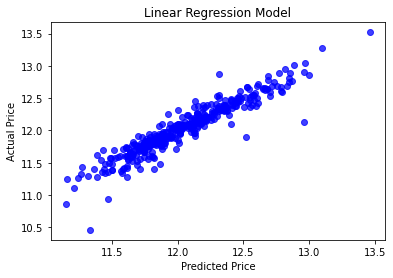

In [82]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
#pltrandom_state=None.show()

# Hyper Parameter Tuning on Randon Forest Regressor

In [86]:
#no. of tress random_forest
n_estimators = [int(x) for x in np.linspace(start=150,stop=1000,num=6)]
#max levels in tree
max_depth = [int(x) for x in np.linspace(start=6,stop=30,num=5)]
#min no. of splitting required to split a node
min_samples_split = [2,7,10]
#min no. of sample required at each leaf node
min_samples_leaf = [2,5]
#max_features
max_features=['sqrt','auto']

In [87]:

random_grid = {'n_estimators':n_estimators,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features':max_features,
              }

print(random_grid)

{'n_estimators': [150, 320, 490, 660, 830, 1000], 'max_depth': [6, 12, 18, 24, 30], 'min_samples_split': [2, 7, 10], 'min_samples_leaf': [2, 5], 'max_features': ['sqrt', 'auto']}


In [88]:
# calculate RMSLE.
from sklearn.metrics import make_scorer
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2    # 1-RMSLE
scorer = make_scorer(score,greater_is_better=True, needs_proba=False)

In [89]:
from sklearn.model_selection import RandomizedSearchCV
rfr_random = RandomizedSearchCV(rfr, param_distributions=random_grid, scoring=scorer, cv=5, n_iter=100, random_state=42, verbose=1, n_jobs=-1)

rfr_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [6, 12, 18, 24, 30],
                                        'max_features': ['sqrt', 'auto'],
                                        'min_samples_leaf': [2, 5],
                                        'min_samples_split': [2, 7, 10],
                                        'n_estimators': [150, 320, 490, 660,
                                                         830, 1000]},
                   random_state=42, scoring=make_scorer(score), verbose=1)

In [90]:
print("best_params:\n",rfr_random.best_params_)
print("\nbest_score:",rfr_random.best_score_)

best_params:
 {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 12}

best_score: 0.999924485958449


# Saving the model

In [91]:
import pickle

In [92]:

# open a file, where you want to store the data
filename = open('hp_rfr.pkl', 'wb')

# dump information to that file
pickle.dump(rfr_random, filename)

In [93]:
model = open('hp_rfr.pkl','rb')
forest = pickle.load(model)

In [94]:
y_prediction =forest.predict(X_test)

# Load the Model

In [95]:
fitted_model=pickle.load(open("hp_rfr.pkl","rb"))
fitted_model

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [6, 12, 18, 24, 30],
                                        'max_features': ['sqrt', 'auto'],
                                        'min_samples_leaf': [2, 5],
                                        'min_samples_split': [2, 7, 10],
                                        'n_estimators': [150, 320, 490, 660,
                                                         830, 1000]},
                   random_state=42, scoring=make_scorer(score), verbose=1)

# Prediction over test dataset

In [97]:
#Filling missing values of test dataset if any to make equal number of features in train and test
test.fillna(999, inplace=True)

In [101]:
# Preprocess test data by finding number of missing values in test dataset
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]
cols_with_missing_test = [col for col in X_test.columns
                     if X_test[col].isnull().any()]

missing_both = cols_with_missing + list(set(cols_with_missing_test) - set(cols_with_missing))

final_X_train = X_train.drop(missing_both, axis=1)
final_X_test = X_test.drop(missing_both, axis=1)

In [103]:
predictions=fitted_model.predict(final_X_test)
predictions

array([12.06124075, 11.82507503, 11.4888657 , 12.09469757, 11.62713059,
       12.74964629, 11.79953131, 12.01177267, 11.68330253, 12.28734033,
       11.80279319, 12.12575695, 12.14135002, 12.3354253 , 11.93867877,
       12.62826054, 11.76137878, 12.48729436, 11.78677468, 11.84916999,
       11.9033991 , 12.694744  , 12.37968828, 11.98898453, 11.9821695 ,
       11.79369935, 11.80811345, 11.99632493, 12.50053913, 12.09789576,
       12.03045559, 12.00110794, 11.71352626, 11.70781214, 11.85855224,
       12.30618044, 11.98363276, 11.52273519, 11.6470437 , 12.18772916,
       11.47098449, 11.86743427, 12.187123  , 12.70606593, 11.47061465,
       11.42110721, 11.8574497 , 11.76048836, 12.14253993, 12.51186154,
       11.67296397, 11.59139406, 11.69224809, 11.82863494, 11.32027563,
       13.03252874, 12.10240334, 11.79945598, 11.86713696, 12.25852227,
       12.60058873, 11.87677836, 11.79761435, 11.50506624, 11.99508746,
       11.81301039, 12.19711357, 12.58990839, 11.69440693, 11.50